In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data2018=pd.read_csv("england-premier-league-teams-2017-to-2018-stats.csv")
data2019=pd.read_csv("england-premier-league-teams-2018-to-2019-stats.csv")
data2020=pd.read_csv("england-premier-league-teams-2019-to-2020-stats.csv")
data2021=pd.read_csv("england-premier-league-teams-2020-to-2021-stats.csv")
data2022=pd.read_csv("england-premier-league-teams-2021-to-2022-stats.csv")

In [37]:
data=pd.concat([data2018,data2019,data2020,data2021,data2022])
data["points"]=3*data["wins"]+1*data["draws"]
print(data.columns)

Index(['team_name', 'common_name', 'season', 'country', 'matches_played',
       'matches_played_home', 'matches_played_away', 'suspended_matches',
       'wins', 'wins_home',
       ...
       'goals_conceded_min_71_to_80', 'goals_conceded_min_81_to_90',
       'draw_percentage_overall', 'draw_percentage_home',
       'draw_percentage_away', 'loss_percentage_ovearll',
       'loss_percentage_home', 'loss_percentage_away',
       'over145_corners_percentage', 'points'],
      dtype='object', length=294)


In [4]:
top_4 = data[data["league_position"]<=4]
non_top_4 = data[data["league_position"]>4]
top_4

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage,points
1,Tottenham Hotspur FC,Tottenham Hotspur,2017/2018,England,38,19,19,0,23,13,...,4,8,21,21,21,18,11,26,13,77
2,Manchester City FC,Manchester City,2017/2018,England,38,19,19,0,32,16,...,1,4,11,11,11,5,5,5,8,100
11,Manchester United FC,Manchester United,2017/2018,England,38,19,19,0,25,15,...,3,2,16,11,21,18,11,26,8,81
12,Liverpool FC,Liverpool,2017/2018,England,38,19,19,0,21,12,...,4,8,32,37,26,13,0,26,5,75
1,Tottenham Hotspur FC,Tottenham Hotspur,2018/2019,England,38,19,19,0,23,12,...,8,10,5,11,0,34,26,42,11,71
2,Manchester City FC,Manchester City,2018/2019,England,38,19,19,0,32,18,...,2,3,5,0,11,11,5,16,5,98
10,Liverpool FC,Liverpool,2018/2019,England,38,19,19,0,30,17,...,3,4,18,11,26,3,0,5,5,97
11,Chelsea FC,Chelsea,2018/2019,England,38,19,19,0,21,12,...,4,3,24,32,16,21,5,37,3,72
2,Manchester City FC,Manchester City,2019/2020,England,38,19,19,0,26,15,...,4,9,8,11,5,24,11,37,24,81
9,Manchester United FC,Manchester United,2019/2020,England,38,19,19,0,18,10,...,1,8,32,37,26,21,11,32,18,66


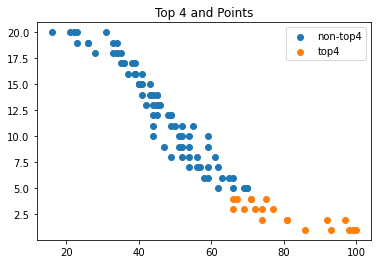

In [5]:
plt.scatter(non_top_4['points'],non_top_4["league_position"], label=f'non-top4')
plt.scatter(top_4['points'], top_4["league_position"], label=f'top4')
plt.rcParams.update({'figure.figsize':(6.4,4.8), 'figure.dpi':100})
plt.title('Top 4 and Points')
plt.legend()
plt.show()

The problem of interest can be formulated as a classification problems where it is predicted that a team will finish top 4 (positives) if they reach at least a certain threshold of points. It is clear from the graph that a good threshold should be a little less than 70 points, we can build a contingency table that serves as a confusion matrix to evaluate each value.

In [29]:
data['Top4']= ['not_Top4' if i>4 else 'Top4' for i in data['league_position']]
data['67pts']= ['O67' if i>=67 else 'U67' for i in data['points']]

False positives occur when the team scored over 67 points ("O67") but did not qualify for the Champions League ("Not Top4"), while false negatives are the cases where the team scored under 67 points ("U67") but still ranked top 4. 

In [34]:
data_crosstab = pd.crosstab(data['Top4'],data['67pts'],rownames=['Actual'], colnames=['Predicted'])
data_crosstab

Predicted,O67,U67
Actual,,
Top4,18,2
not_Top4,3,77


The Thresholds of 66 and 67 points both return an accuracy of 95%, but the threshold of 67 was chosen because it had more balance between false negatives and false positives: the confusion matrix indicates a false positive rate of 3.75% and a true positive rate of 90%. 

In [ ]:
data = data.drop(columns=["common_name", "season","country","matches_played","matches_played_away","matches_played_home","suspended_matches","wins","draws","draws_home","draws_away",""])